# Safety Rating Prediction for Insurace risk Rating

**Life cycle of Machine learning Project**

* Understanding the problem Statement
* Data Collection
* Exploratory Data Analysis
* Data Cleaning
* Data Preprocessing
* Model Training
* Choose best Model

# 1) Problem Statement

* This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.
* Predict Insurance risk rating based on the input features.
* Prediction results can be used to give insurance rating agency a suggestion for Insurance risk rating.

# 2) Data Collection
* Data is collected from scrapping of Kaggle Automobile Dataset
* Dataet consists of 20 columns and 205 rows

# 2.1) Importing Data and Reqired Packages
**Importing pandas, Numpy, Matplotlib, Seaborn and warnings library.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

**Download and Import the CSV Data as Pandas DataFrame**

* Data is dowloaded from "https://www.kaggle.com/datasets/toramky/automobile-dataset"
* and uploaded to Jupyter Notebook


In [5]:
df = pd.read_csv("Automobile_data.csv")

**Show Top 5 Records**

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Shape of the dataset**

In [7]:
df.shape

(205, 26)

**Summary of the dataset**

In [8]:
# Display summary statistics for curent int,float datatypes in dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


## Observation on Summary
* There seems to be less outliers.
* There is no -3 rating, not even one vehicle has highest saftey.
* more than 50% of vechile has low saftey rating.
* There seems to be few outliers in mileage, I am not sure wheater a car can give 54 mpg.

**Check Datatypes in the dataset**

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Observation on Dtypes and Null
* normalized-losses,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
* Above mentioned features Need to be change to float / int Dtype
* After converting Null has to be checked again, because there are few visible null's in normalized-losses

In [10]:
# Replace '?' with NaN for entire dataset
df.replace('?',np.nan,inplace = True)

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
# Checking unique values for 'num-of-doors' 
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [13]:
# Replace object to int for 'num-of-doors' feature
df['num-of-doors'].replace('two',2,inplace =True)
df['num-of-doors'].replace('four',4,inplace =True)

In [14]:
# Checking unique values for 'num-of-doors' 
df['num-of-doors'].unique()

array([ 2.,  4., nan])

In [15]:
# Checking unique values for 'num-of-cylinders' 
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
# Replace object to int for ''num-of-cylinder' feature
# yes there are 5 cylinder engines they are popular in Volvo and Benz
df['num-of-cylinders'].replace('two',2,inplace =True)
df['num-of-cylinders'].replace('three',3,inplace =True)
df['num-of-cylinders'].replace('four',4,inplace =True)
df['num-of-cylinders'].replace('five',5,inplace =True)
df['num-of-cylinders'].replace('six',6,inplace =True)
df['num-of-cylinders'].replace('eight',8,inplace =True)
df['num-of-cylinders'].replace('twelve',12,inplace =True)

In [17]:
# Checking unique values for 'num-of-cylinders'
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [19]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].head()

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,NaN,3.47,2.68,111,5000,13495
1,NaN,3.47,2.68,111,5000,16500
2,NaN,2.68,3.47,154,5000,16500
3,164,3.19,3.4,102,5500,13950
4,164,3.19,3.4,115,5500,17450


In [20]:
# convert normalized-losses,horsepower,peak-rpm,price feature to numeric value
to_convert = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
df[to_convert] = df[to_convert].astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

# Observation on Dtypes and Null
* normalized-losses,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
* Above mentioned features has been converted to float / int Dtype
* Now we can see there are lot of Null values in **'normalized-losses'**
* I suspect for **'normalized-losses'** itself we have to do a regression to find the null values.

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
num-of-doors,203.0,3.123153,0.994841,2.00,2.00,4.00,4.00,4.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num-of-cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


## Observation
* There seems to less/No ouliers except nulls

## 3) Exploring Data

In [23]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 18 numerical features : ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

We have 8 categorical features : ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']


## Numeric data

In [24]:
df_numeric = df[numeric_features]
df_numeric.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Categorical Data

In [25]:
df_cat = df[categorical_features]
df_cat.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


## Feature Information
* **symboling : rating corresponds to the degree to which the auto is more risky than its price indicates -3 low value lesser risk, 3 max value higher risk.
* **normalized-losses : the relative average loss payment per insured vehicle year.
* **All other features are self Explainatry with the name.


In [26]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [27]:
numeric_features

['symboling',
 'normalized-losses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

## Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## Numerical features

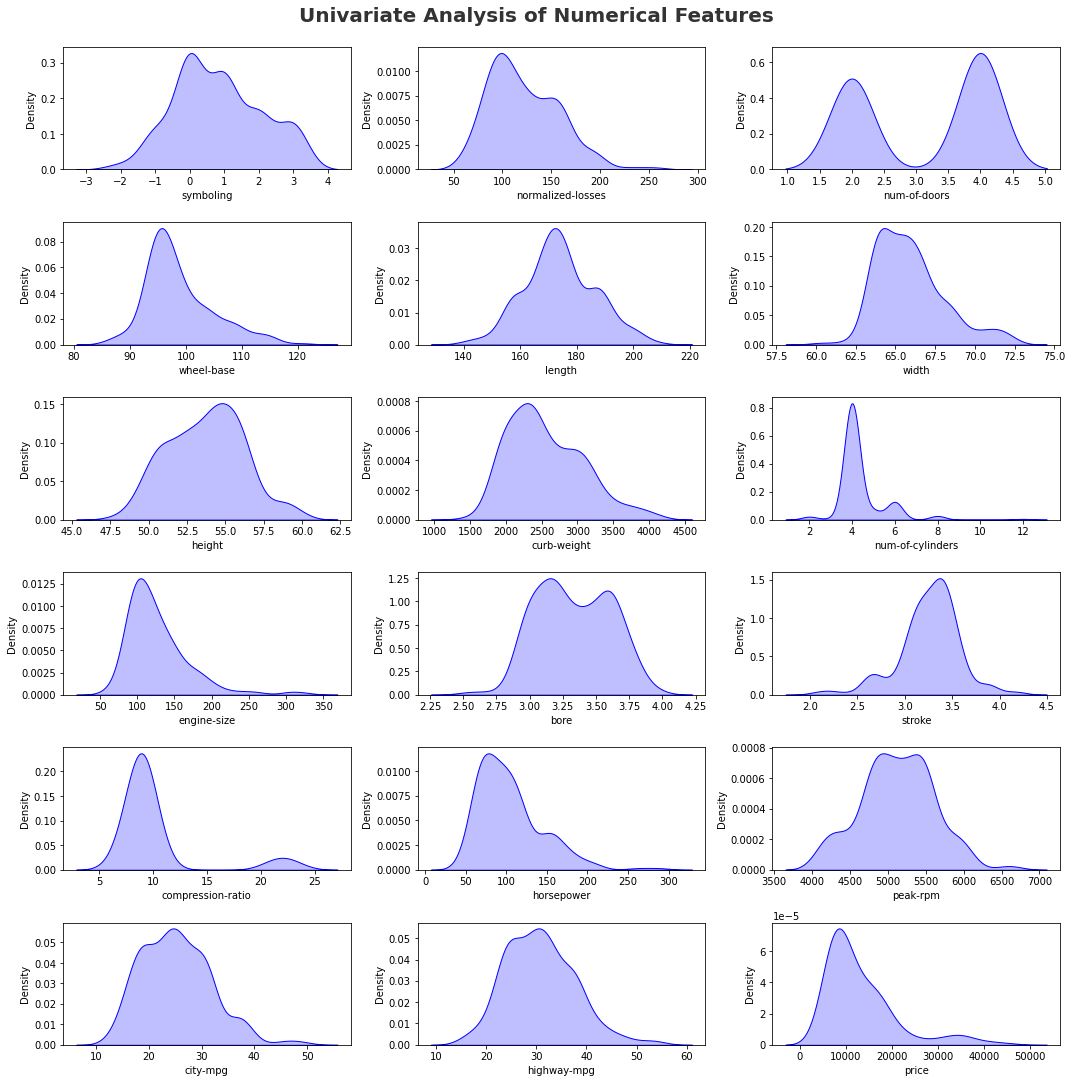

In [28]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observation
* price, horsepower, comppressio-ratio, engine-size,no-of-cylinders, normalized-losses are right skewed
* symboling is left skewed

## Categorical Features

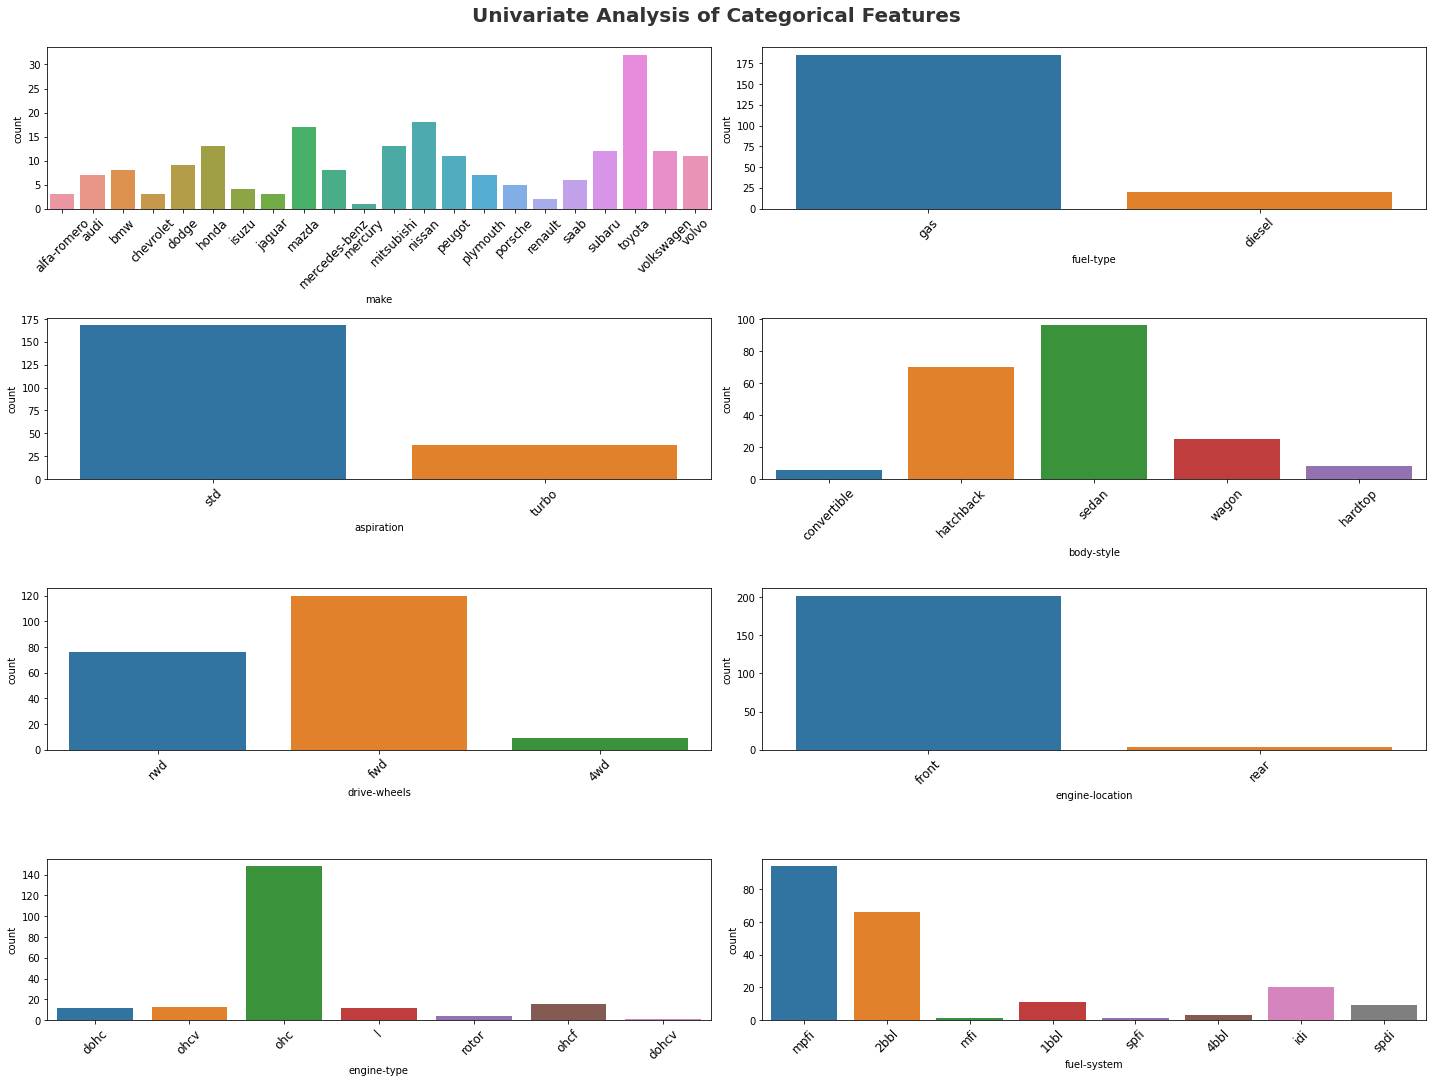

In [29]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45,fontsize=12)
    plt.tight_layout()

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

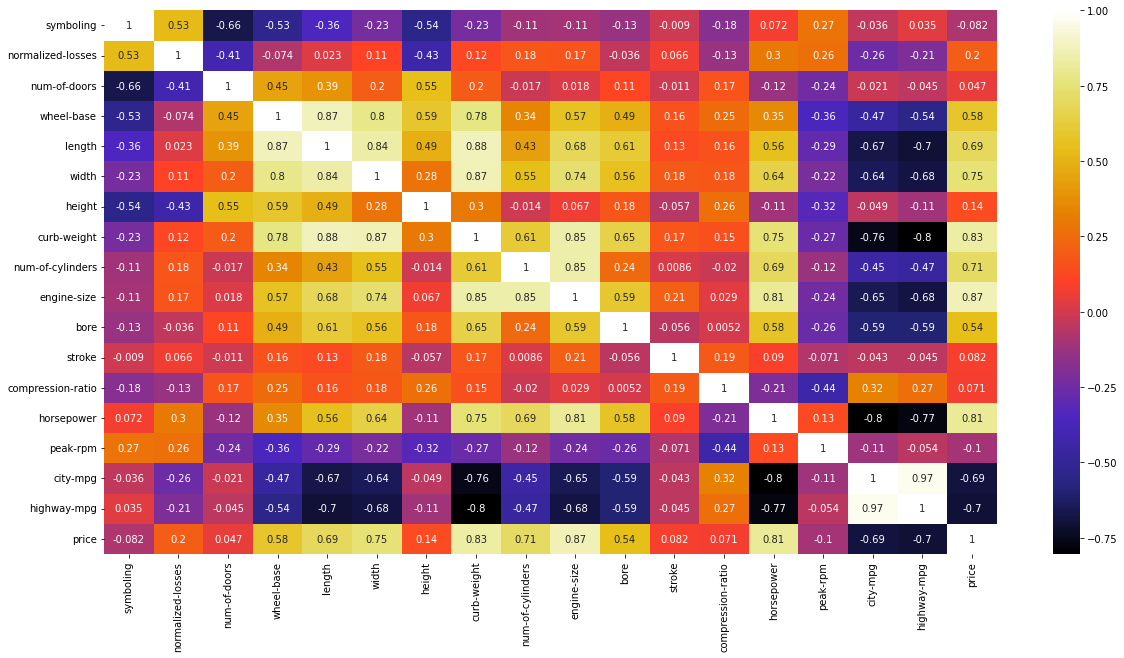

In [30]:
# Checking Correlation with each feature
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

## Observation
* We can see **'normalized-Losses and Peak-rpm'** has **positive** correlation with **'symboling'**
* We can see **'lenght, no-of-doors, height, wheel-base'** has **Negative** correlation with **'symboling'**
* we can observe that **fetures related to performance and price** has postive correlation with **'normalized-Losses'**
* we can observe that **'no-of-doors,height and mileage** has negative correlation with **'normalized-Losses'

## Check Multicollinearity for Categorical features
* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Symboling**

In [31]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['symboling'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,make,Reject Null Hypothesis
1,fuel-type,Reject Null Hypothesis
2,aspiration,Reject Null Hypothesis
3,body-style,Reject Null Hypothesis
4,drive-wheels,Reject Null Hypothesis
5,engine-location,Reject Null Hypothesis
6,engine-type,Reject Null Hypothesis
7,fuel-system,Reject Null Hypothesis


## Checking Null Values

In [32]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [33]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


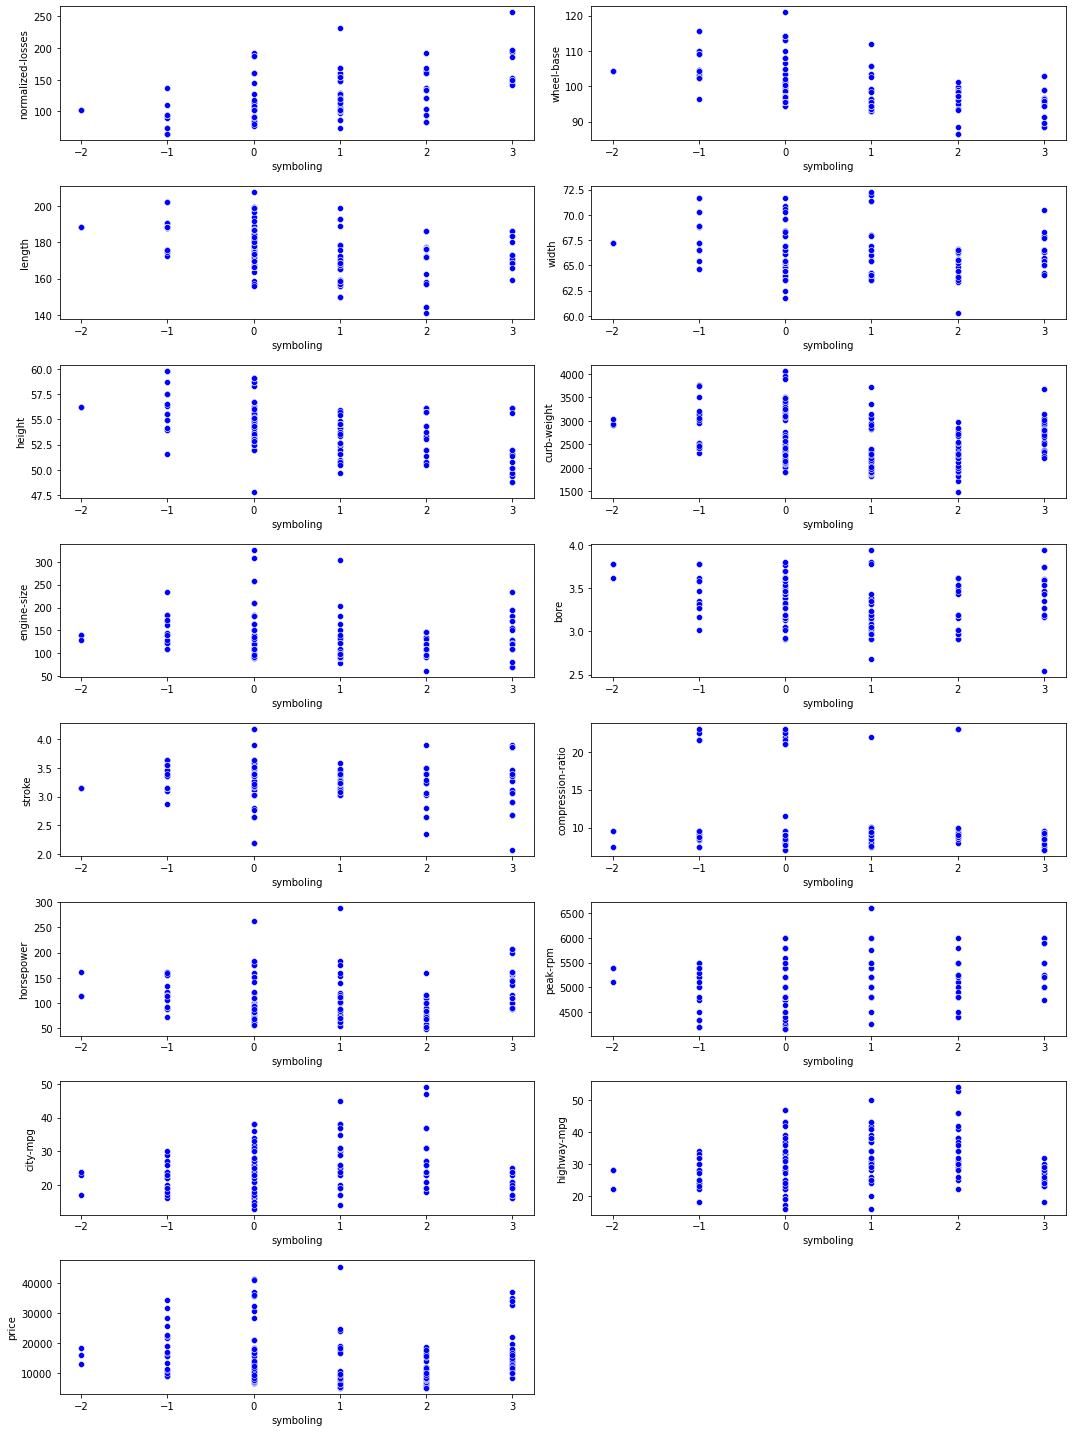

In [34]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='symboling', y=continues_features[i], color='b')
    plt.tight_layout()

## Observstion
* normalized losses feature has postive linear correlation with symboling.
* wheel-base, length and height has negative linear correlation with symboling

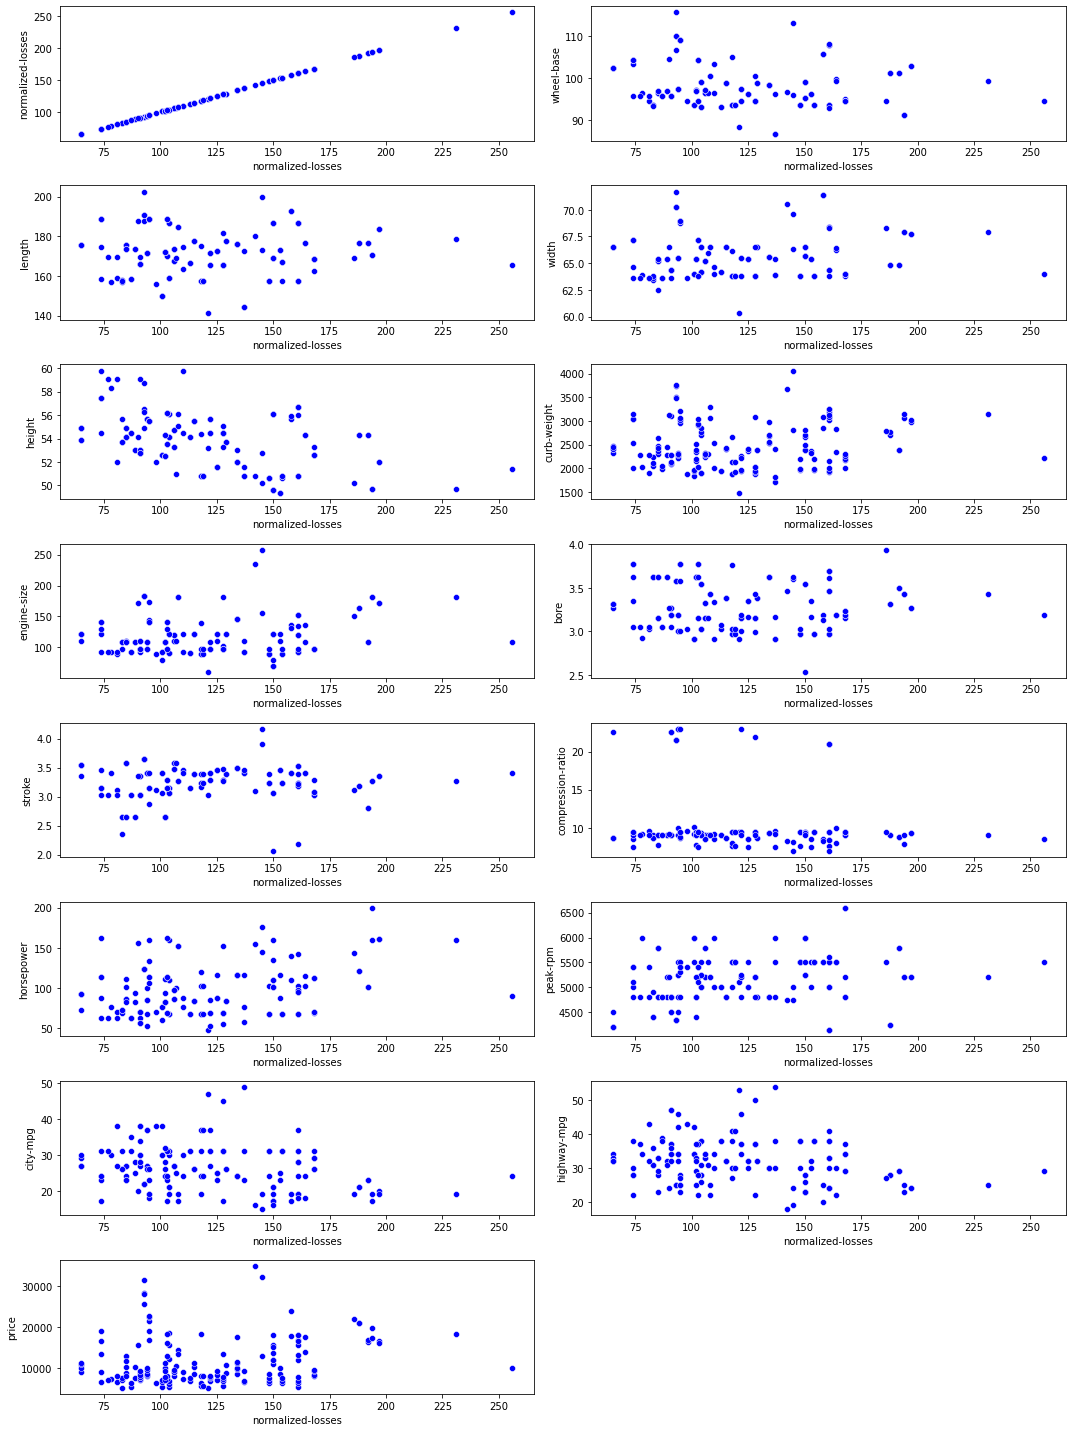

In [35]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='normalized-losses', y=continues_features[i], color='b')
    plt.tight_layout()

## Observstion
* height feature has negative linear correlation with normalized-losses.
* price and horse-power has positive linear correlation with normalized-losses.

# Initial EDA Report
* There seems to be few outliers in 'num-of-cylinders','engine-size','compression-ratio','city-mpg','highway-mpg'
* **But these features doen't have correlation values above zero for both 'symboling' and 'normalized-losses' feature**
* **Point to note is that there are 41 Null entries in normalized-losses**
* We can see **'normalized-Losses and Peak-rpm'** has **positive** correlation with **'symboling'**
* We can see **'lenght, no-of-doors, height, wheel-base'** has **Negative** correlation with **'symboling'**
* we can observe that **fetures related to performance and price** has postive correlation with **'normalized-Losses'**
* we can observe that **'no-of-doors,height and mileage** has negative correlation with **'normalized-Losses'